<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas 1: *Data Preparation & Dimensionality Reduction***

###**Tenggat Waktu: 2 Oktober 2021, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dataset yang digunakan pada tugas ini beserta deskripsinya telah disediakan di SCeLe.
2. Buatlah program Jupyter Notebook yang menjawab pertanyaan sesuai dengan perintah soal yang disediakan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama.ipynb**. Contoh: F_Tugas1_1706979341_Lulu Ilmaknun Qurotaini.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **2 Oktober 2021, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Muhammad Ichsanul Amal"
KELAS = "C"
NPM = "1906353454"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ["https://medium.com/@prasadostwal/multi-dimension-plots-in-python-from-2d-to-6d-9a2bf7b8cc74", "Tutorial1.ipynb", "https://arikuncoro.gurusiana.id/article/2020/09/perbedaan-standardisasi-normalisasi-dan-scaling-501221?bima_access_status=not-logged"]

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Muhammad Ichsanul Amal dari kelas C dengan NPM 1906353454, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Muhammad Ichsanul Amal)


## Preprocessing

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler

1. [15] Berikan ringkasan mengenai data tersebut terkait dengan deskripsi setiap atribut, jumlah
atribut (numerik & kategorik), jumlah missing values, jumlah duplikasi data, dan kemungkinan
adanya outliers pada data!

In [4]:
startup_df = pd.read_csv("startup_data.csv")
startup_df.head()

,state_code,latitude,longitude,founded_at,age_first_funding_year,age_last_funding_year,funding_rounds,funding_total_usd,category_code,has_VC,has_angel,has_seriesA,has_seriesB,has_seriesC,has_seriesD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,1/1/2007,2.2493,3.0027,3.0,375000,music,No,Yes,No,No,No,No,1.0000,No,acquired
1,CA,37.238916,-121.973718,1/1/2000,5.1260,9.9973,4.0,40100000,enterprise,Yes,No,No,Yes,Yes,Yes,4.7500,Yes,acquired
2,CA,32.901049,-117.192656,3/18/2009,1.0329,1.0329,1.0,-2600000,web,No,No,Yes,No,No,No,4.0000,Yes,acquired
3,CA,37.320309,-122.050040,1/1/2002,3.1315,5.3151,3.0,40000000,software,No,No,No,Yes,Yes,Yes,3.3333,Yes,acquired
4,CA,37.779281,-122.419236,8/1/2010,NaN,1.6685,2.0,1300000,games_video,Yes,Yes,No,No,No,No,1.0000,Yes,closed


In [5]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state_code              949 non-null    object 
 1   latitude                949 non-null    float64
 2   longitude               949 non-null    float64
 3   founded_at              949 non-null    object 
 4   age_first_funding_year  885 non-null    float64
 5   age_last_funding_year   894 non-null    float64
 6   funding_rounds          946 non-null    float64
 7   funding_total_usd       949 non-null    int64  
 8   category_code           897 non-null    object 
 9   has_VC                  949 non-null    object 
 10  has_angel               949 non-null    object 
 11  has_seriesA             949 non-null    object 
 12  has_seriesB             949 non-null    object 
 13  has_seriesC             949 non-null    object 
 14  has_seriesD             949 non-null    ob

In [6]:
startup_df.shape

(949, 18)

In [7]:
startup_df.describe()

,latitude,longitude,age_first_funding_year,age_last_funding_year,funding_rounds,funding_total_usd,avg_participants
count,949.000000,949.000000,885.000000,894.000000,946.000000,9.490000e+02,901.000000
mean,38.530398,-103.465916,2.322209,3.987377,2.313953,1.544590e+09,2.857545
std,3.756150,22.382011,2.941926,3.313172,1.402098,2.446676e+10,1.875341
min,25.752358,-122.756956,-9.046600,-9.046600,1.000000,-9.500000e+06,1.000000
25%,37.388869,-122.200914,0.517800,1.690375,1.000000,2.700000e+06,1.500000
50%,37.779281,-118.354605,1.424700,3.494500,2.000000,1.000000e+07,2.500000
75%,40.730646,-77.212493,3.602700,5.543150,3.000000,2.490000e+07,4.000000
max,59.335232,18.057121,34.490400,34.490400,10.000000,6.423100e+11,16.000000


Terdapat keanehan pada kolom funding_total_usd (terdapat data negatif)

In [8]:
# Cek missing value
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

cek_null(startup_df)


                        Total   Percent
age_first_funding_year     64  0.067439
age_last_funding_year      55  0.057956
category_code              52  0.054795
avg_participants           48  0.050580
funding_rounds              3  0.003161


In [9]:
# Cek data duplicate
startup_df.duplicated().sum()

26

<AxesSubplot:>

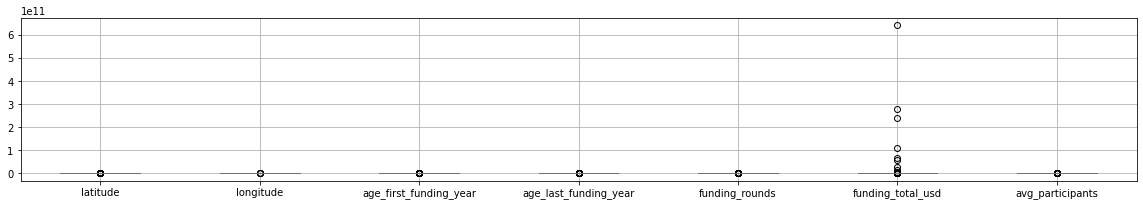

In [10]:
# Cek outlier
data = startup_df.select_dtypes(exclude="object")
data.boxplot(figsize=(20,3))

In [11]:
# Cek outlier
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

latitude                  81
longitude                  4
age_first_funding_year    24
age_last_funding_year     17
funding_rounds            18
funding_total_usd         71
avg_participants          24
dtype: int64

2. [10] Lakukan eksplorasi sederhana pada data dan ceritakan insight yang Anda dapatkan dari data
tersebut! (Hint: Anda bisa mencari hubungan antar atribut atau melakukan visualisasi sederhana
dari atribut tertentu)

<AxesSubplot:xlabel='status', ylabel='count'>

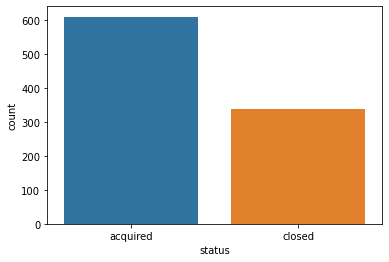

In [12]:
# Jumlah startup yang berhasil didanai
sns.countplot(x="status", data=startup_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


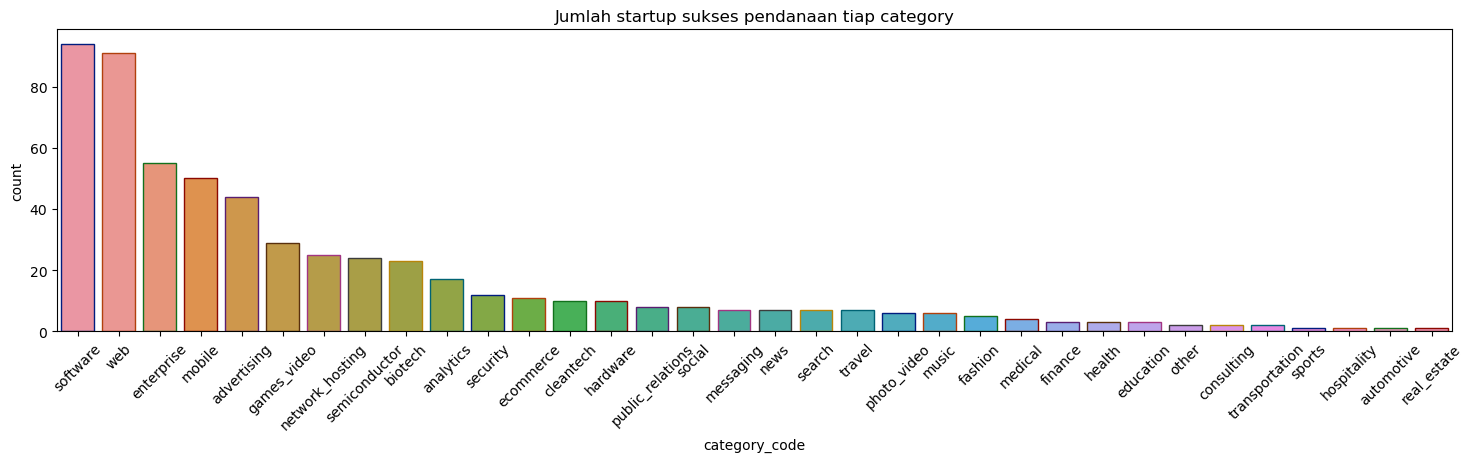

In [13]:
df_success = startup_df[startup_df["status"] == "acquired"]
plt.figure(figsize=(18,4),dpi=100)
plt.xticks(rotation=45)
plt.title("Jumlah startup sukses pendanaan tiap category")
sns.countplot(df_success["category_code"], edgecolor=sns.color_palette("dark"), order = df_success["category_code"].value_counts().index);

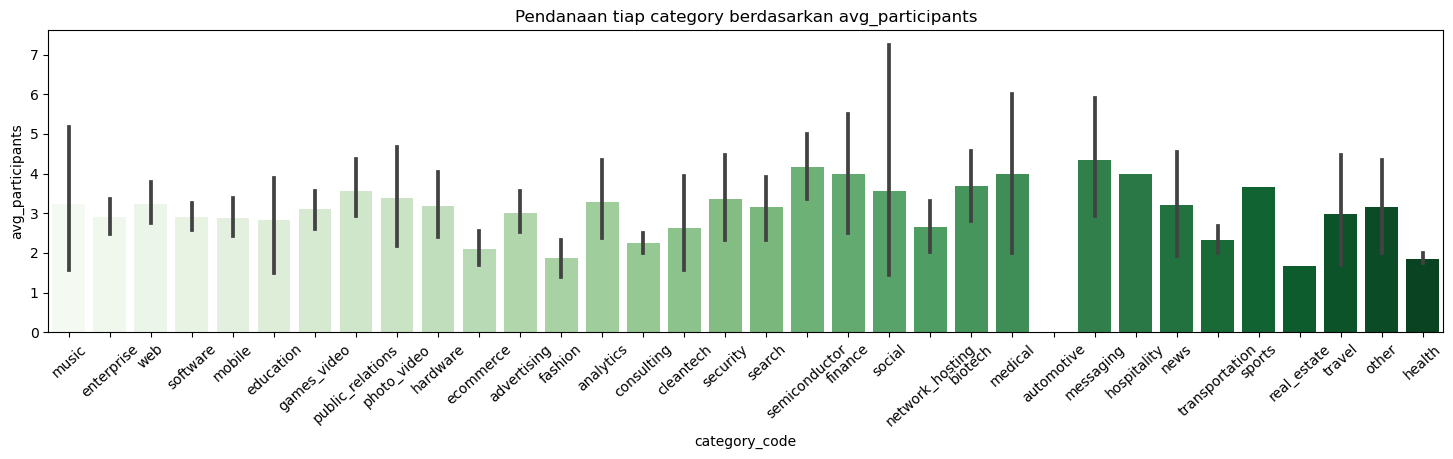

In [14]:
df_success = startup_df[startup_df["status"] == "acquired"]
plt.figure(figsize=(18,4),dpi=100)

plt.xticks(rotation=42)
plt.title("Pendanaan tiap category berdasarkan avg_participants")
sns.barplot(x=df_success["category_code"], y=df_success["avg_participants"], palette="Greens");

<AxesSubplot:title={'center':'Jumlah startup sukses pendanaan tiap state'}, ylabel='State Code'>

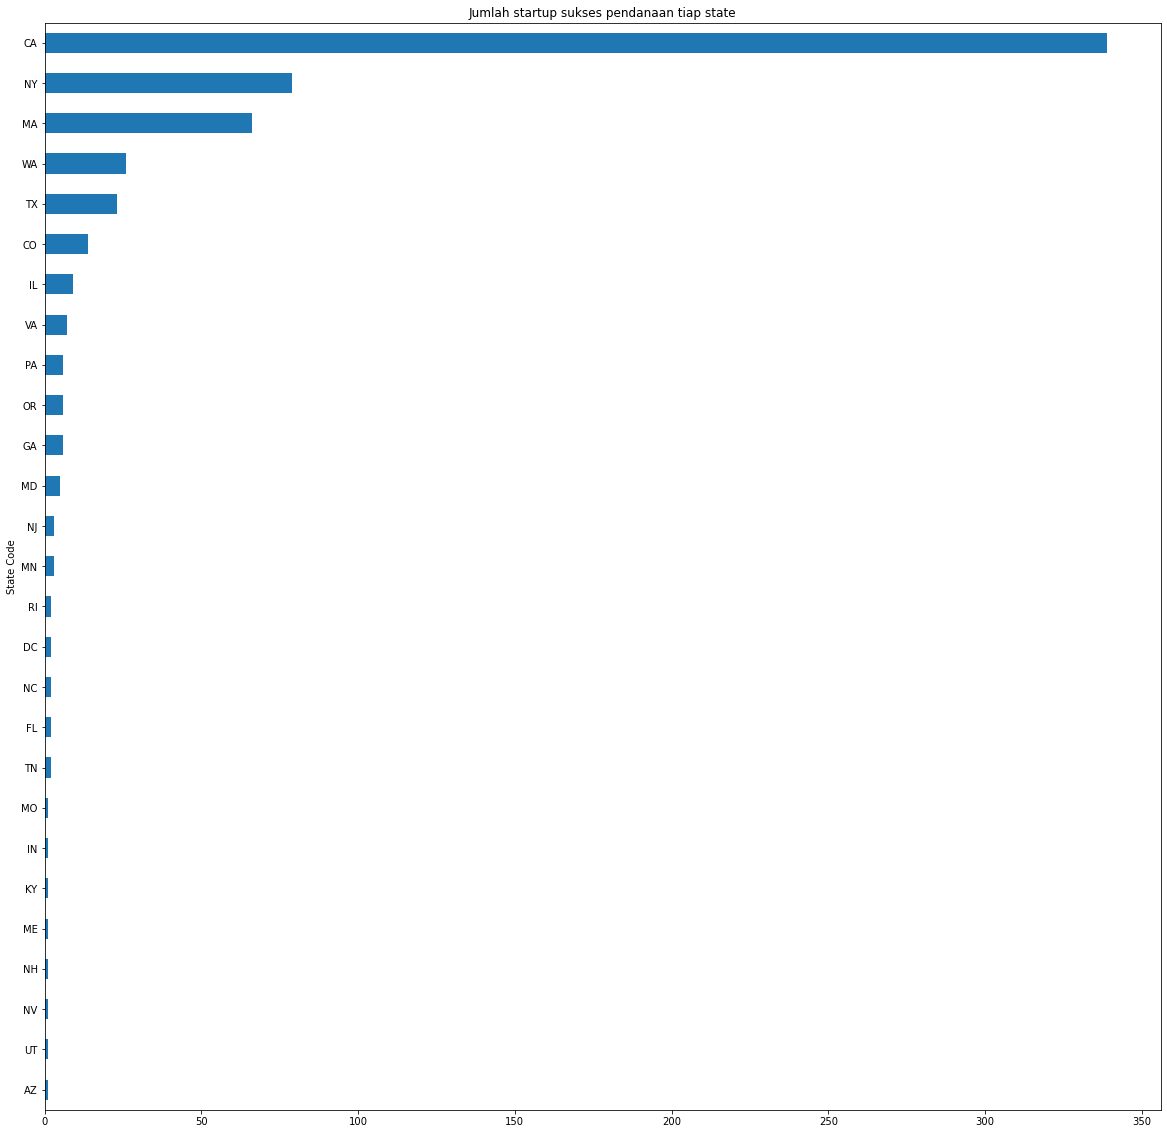

In [15]:
df_success = startup_df[startup_df["status"] == "acquired"]
a = df_success.groupby(["state_code"])["status"].count()
a.sort_values(inplace=True)
a.plot(kind='barh', title='Jumlah startup sukses pendanaan tiap state', xlabel='State Code', figsize=(20, 20))

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'age_first_funding_year'}>],
       [<AxesSubplot:title={'center':'age_last_funding_year'}>,
        <AxesSubplot:title={'center':'funding_rounds'}>,
        <AxesSubplot:title={'center':'funding_total_usd'}>],
       [<AxesSubplot:title={'center':'avg_participants'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

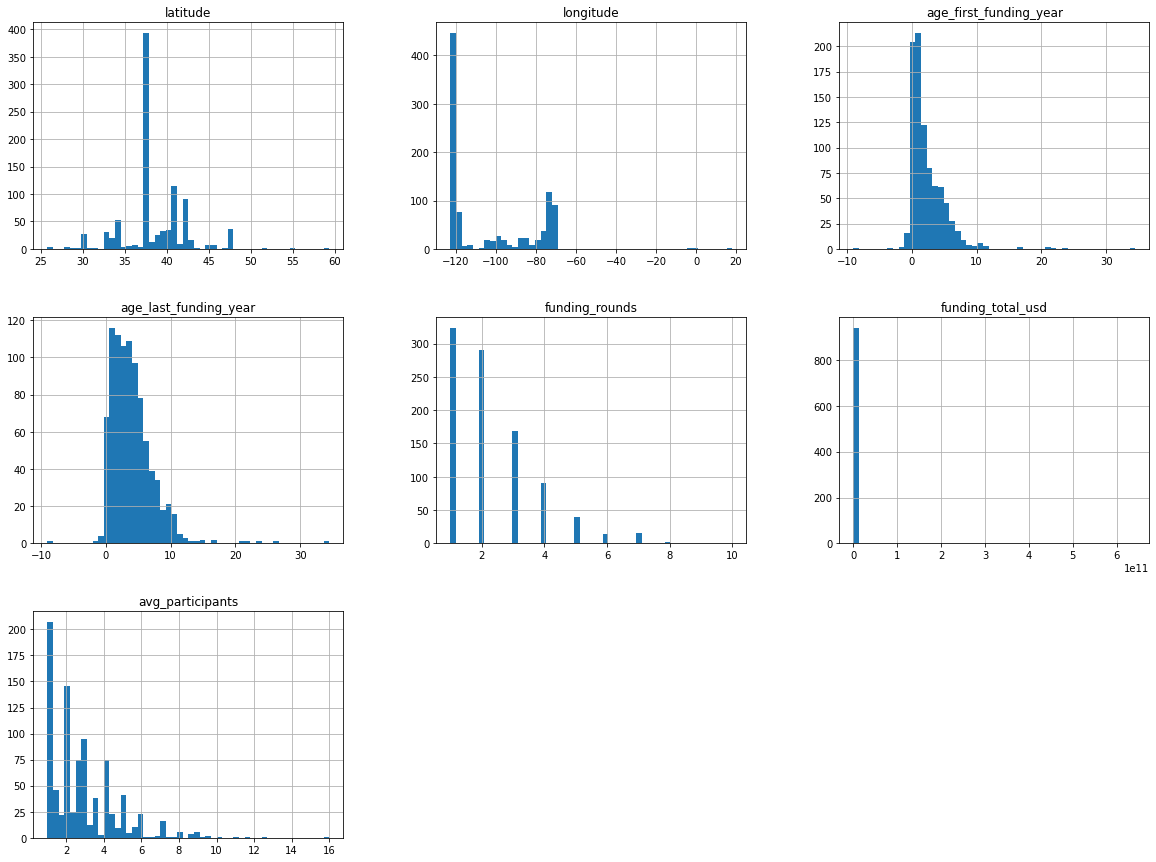

In [16]:
# Melihat distribusi tiap fitur
startup_df.hist(bins=50, figsize=(20,15))

Text(0.5, 1.0, 'Correlation matrix')

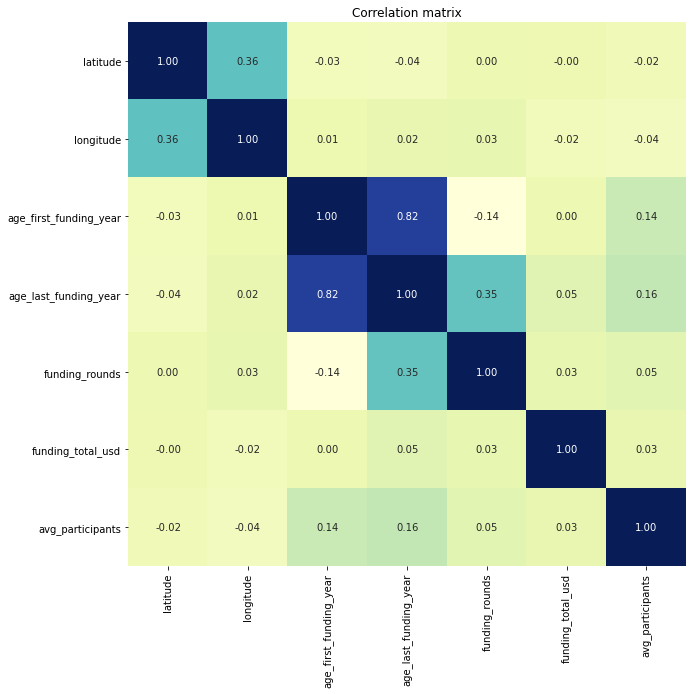

In [17]:
# Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(10,10))

sns.heatmap(startup_df.select_dtypes(np.number).corr(), 
        annot=True,
        cbar=False,
        fmt="0.2f",
        cmap="YlGnBu",
        xticklabels=startup_df.select_dtypes(np.number).columns,
        yticklabels=startup_df.select_dtypes(np.number).columns)
plt.title("Correlation matrix")

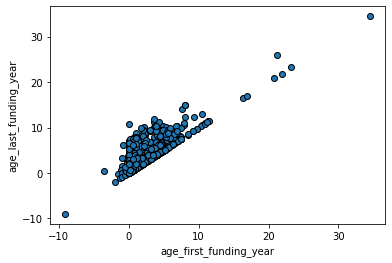

In [18]:
# Yang terlihat korelasi linearnya kuat hanya age_first_funding_year dan age_last_funding_year
fig, ax = plt.subplots()
_ = plt.scatter(x=startup_df['age_first_funding_year'], y=startup_df['age_last_funding_year'], edgecolors="#000000")
_ = ax.set(xlabel="age_first_funding_year", ylabel="age_last_funding_year")

3. [15] Lakukan penanganan terhadap missing values, duplikasi data, dan outliers jika ada!

In [19]:
# Tindak lanjut terhadap duplicate data

# Drop duplicate
startup_df.drop_duplicates(inplace=True)

In [20]:
# Tindak lanjut terhadap missing value

# pada category other akan saya isi dengan kategori other
startup_df.fillna({"category_code":"other"}, inplace=True) 

# sisanya akan dilakukan penghapusan semua row yang memiliki missing value
startup_df.dropna(inplace=True)



Untuk outlier saya tetapkan untuk sementara karena menurut saya outlier pada tiap fitur tidak terlalu signifikan. Apabila diperlukan, tentunya outlier tersebut akan dilakukan penggantian dengan nilai mediannya atau nilai pada batas quartil, atau bisa juga dilakukan drop terhadap rownya.

Selanjutnya saya juga akan merapikan data untuk memudahkan dalam pemrosesan selanjutnya, khususnya untung pemodelan

In [21]:
startup_df["founded_at"] = pd.to_datetime(startup_df["founded_at"]) # mengubah tipe data founded_at
startup_df.rename(columns={"status":"is_acquired"}, inplace=True) # merename column
startup_df.replace({"Yes":1, "No": 0, "acquired":1, "closed":0}, inplace=True) # mereplace data categorical menjadi angka
startup_df = startup_df[startup_df["funding_total_usd"] >= 0] # Mendrop startup yang funding_total_usd nya bernilai negatif
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 0 to 922
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   state_code              765 non-null    object        
 1   latitude                765 non-null    float64       
 2   longitude               765 non-null    float64       
 3   founded_at              765 non-null    datetime64[ns]
 4   age_first_funding_year  765 non-null    float64       
 5   age_last_funding_year   765 non-null    float64       
 6   funding_rounds          765 non-null    float64       
 7   funding_total_usd       765 non-null    int64         
 8   category_code           765 non-null    object        
 9   has_VC                  765 non-null    int64         
 10  has_angel               765 non-null    int64         
 11  has_seriesA             765 non-null    int64         
 12  has_seriesB             765 non-null    int64     

In [22]:
# Menambah fitur 
new_df = pd.get_dummies(startup_df, columns=["category_code", "state_code"], prefix=["category", "state"])
new_df

,latitude,longitude,founded_at,age_first_funding_year,age_last_funding_year,funding_rounds,funding_total_usd,has_VC,has_angel,has_seriesA,...,state_OR,state_PA,state_RI,state_TN,state_TX,state_UT,state_VA,state_WA,state_WI,state_WV
0,42.358880,-71.056820,2007-01-01,2.2493,3.0027,3.0,375000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,37.238916,-121.973718,2000-01-01,5.1260,9.9973,4.0,40100000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,37.320309,-122.050040,2002-01-01,3.1315,5.3151,3.0,40000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,37.391559,-122.070264,2005-01-01,1.7205,5.2110,3.0,26000000000,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,38.057107,-122.513742,2004-01-01,1.6466,6.7616,3.0,34100000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,47.802184,-122.196307,2000-01-01,5.6301,8.7589,5.0,122500000,1,0,0,...,0,0,0,0,0,0,0,1,0,0
918,37.740594,-122.376471,2009-01-01,0.5178,0.5178,1.0,1100000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
920,37.408261,-122.015920,1999-01-01,8.4959,8.4959,1.0,44000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
921,37.556732,-122.288378,2009-01-01,0.7589,2.8329,2.0,15500000,0,0,1,...,0,0,0,0,0,0,0,0,0,0



4. [10] Menurut Anda, apakah perlu dilakukan normalisasi terhadap data sebelum pemrosesan lebih
lanjut, atau cukup menggunakan data asli? Jika ya, bentuk normalisasi apa yang tepat digunakan
pada data? Jelaskan secara singkat alasan Anda!

Menurut saya hal itu bergantung pada algoritma pemodelan yang akan digunakan pada proses selanjutnya, tetapi dalam hal ini menurut saya diperlukan normalisasi. Normalisasi yang tepat digunakan pada data adalah Min-Max Scaling. Min-max Scaling akan membuat standar deviasi dari data menjadi lebih kecil sehingga dapat menekan efek outlier. Selanjutnya, saya juga tidak mengetahui distribusi data sebenarnya dan bisa dilihat pada beberapa visualisasi histogram, terdapat data yang bukan merupakan distribusi normal sehingga akan lebih baik apabila dilakukan normalisasi terlebih dahulu apabila ingin menggunakan algoritma pemodelan yang tidak memiliki asumsi terhadap distribusi data. 

## Dimensionality reduction

5. [10] Visualisasikan dataset tersebut dengan menggunakan t-SNE! (2 komponen)

In [23]:
cancer_df = pd.read_csv("cancer_reg.csv")

In [24]:
cancer_df.shape

(3047, 14)

In [25]:
cancer_df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,41.7,2.54,52.5,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,33.7,2.34,44.5,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,45.8,2.62,54.2,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,43.4,2.52,52.7,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,48.9,2.34,57.8,6.796657


In [26]:
X = cancer_df.loc[:, ~cancer_df.columns.isin(['TARGET_deathRate'])]
Y = cancer_df[["TARGET_deathRate"]]

X_std = StandardScaler().fit_transform(X) # Standarisasi data

In [27]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_std)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3047 samples in 0.033s...
[t-SNE] Computed neighbors for 3047 samples in 0.821s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3047
[t-SNE] Computed conditional probabilities for sample 2000 / 3047
[t-SNE] Computed conditional probabilities for sample 3000 / 3047
[t-SNE] Computed conditional probabilities for sample 3047 / 3047
[t-SNE] Mean sigma: 0.624249
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.671371
[t-SNE] KL divergence after 1000 iterations: 1.490921


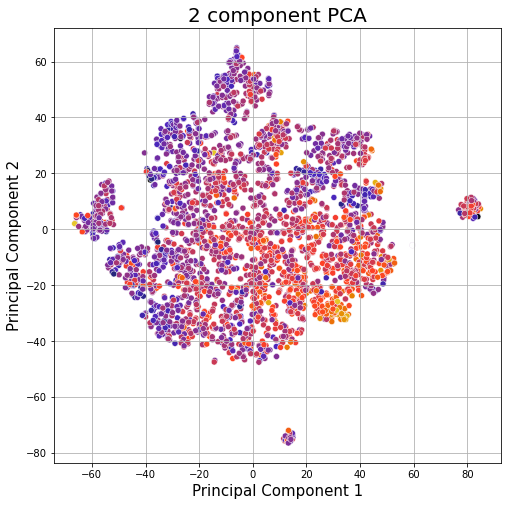

In [28]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

df_tsne = pd.DataFrame()
df_tsne["comp-1"] = z[:,0]
df_tsne["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2",
                palette=sns.color_palette("hls", 3),
                cmap='CMRmap',
                marker='o',
                c = cancer_df.TARGET_deathRate, # untuk membedakan warna antar interval pada death_rate
                data=df_tsne,
                )

ax.grid()

6. [20] Implementasikan step-by-step PCA secara manual pada data hasil preprocessing!
Pilih jumlah komponen utama yang menurut Anda sebaiknya digunakan sehingga dapat
menggambarkan data dengan baik. Sertakan juga alasan yang mendasari Anda melakukan
pemilihan tersebut! (Hint: Anda bisa menggunakan rasio kumulatif dari nilai eigen ke-i sebagai
persentase variance yang dapat di-cover oleh i nilai eigen tertinggi)
Catatan: penggunaan library yang diperbolehkan pada implementasi hanya library numpy dan
pandas

In [29]:
mean_vec = np.mean(X_std, axis=0)

# Menghitung covariance matrix
cov_mat = np.cov(X_std.T)

print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.0003283   0.93971619  0.07357732  0.26923304  0.92719784 -0.13573846
   0.08209832 -0.02410542 -0.12500964 -0.12288443  0.06480906 -0.10614255
  -0.03451896]
 [ 0.93971619  1.0003283   0.06271044  0.22328004  0.97795501 -0.06693991
   0.06350917 -0.0246068  -0.14853595 -0.14411651  0.08618976 -0.18108854
  -0.07444445]
 [ 0.07357732  0.06271044  1.0003283  -0.00103653  0.02692119  0.00904922
   0.077308    0.01809511 -0.01473807 -0.00910855 -0.11843884 -0.11956372
  -0.11822009]
 [ 0.26923304  0.22328004 -0.00103653  1.0003283   0.23560018 -0.78922426
   0.04401721 -0.01329211 -0.09169273 -0.15332872  0.1121021   0.35523945
  -0.0101979 ]
 [ 0.92719784  0.97795501  0.02692119  0.23560018  1.0003283  -0.06532059
   0.05573981 -0.02522727 -0.17666562 -0.17799074  0.10997654 -0.16051596
  -0.05775913]
 [-0.13573846 -0.06693991  0.00904922 -0.78922426 -0.06532059  1.0003283
  -0.05567062 -0.02928961 -0.21407131 -0.14821218  0.074332   -0.64306792
  -0.01228654]
 [ 0

In [30]:
# Vektor dan nilai eigen dari covariance
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs) 
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-4.84153957e-01 -1.99030506e-01 -1.94266502e-01  9.17415177e-02
   7.96162881e-01  1.46153199e-01  8.37789383e-02 -6.21965107e-02
  -8.87748893e-02 -1.59221598e-02  5.26222151e-02  5.18776410e-02
   1.03698021e-02]
 [-4.98335836e-01 -1.59992698e-01 -2.27381633e-01 -7.45124392e-01
  -3.18392459e-01 -7.05985958e-02  1.85219841e-02 -3.54278581e-02
  -1.00965702e-01 -1.56353177e-02  1.87455886e-02  1.91353007e-02
  -6.22537615e-03]
 [-4.22909081e-02  7.88841446e-03 -1.56538315e-01  1.73817174e-02
  -2.90132402e-02 -9.46151459e-03 -2.20389743e-02 -6.06404634e-02
   6.80723665e-01 -4.64033576e-01  5.14696294e-01 -7.38414033e-02
   1.38462694e-01]
 [-1.77064142e-01 -3.70050828e-01  4.43913037e-01 -2.44147080e-02
   4.95691154e-02 -3.18142615e-02 -5.90803477e-01  4.61173099e-01
   1.92086305e-01  9.73159356e-02 -2.04276817e-02 -1.45164091e-01
  -3.16187943e-02]
 [-5.01947908e-01 -1.53307621e-01 -1.97433981e-01  6.56306422e-01
  -4.68799086e-01 -7.14802098e-02 -7.65727764e-02 -8

In [31]:
# Membuat list dari tuple (eigenvalue, eigenvector) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Mengurutkan eig_pairs dari nilai eigen tertinggi ke terendah
eig_pairs.sort() 
eig_pairs.reverse() 

In [32]:
print('Eigenvalues in descending order:') 
for i in eig_pairs: 
    print(i[0])

Eigenvalues in descending order:
3.2619228227900487
2.5551365657961305
1.7957281381201873
1.1559156592108528
1.0034782989232065
0.9767077690466336
0.8777692587526896
0.7266908580196875
0.3691505568872563
0.12465288805004347
0.07639400045027393
0.06129215554840597
0.01942892072238059


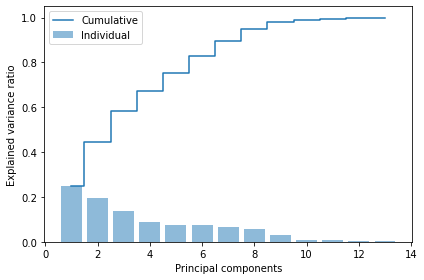

In [33]:
tot = sum(np.abs(eig_vals)) 
var_exp = [(i / tot) for i in sorted(np.abs(eig_vals), reverse=True)]

cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha=0.5, align='center', label='Individual') 
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid',  label='Cumulative') 
plt.ylabel('Explained variance ratio') 
plt.xlabel('Principal components') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.savefig('./fig-pca-var-exp.png', dpi=300) 
plt.show()

In [34]:
arr = []
# memilih 4 fitur karena sudah meng-cover 60 persen variance dari data dan agar lebih mudah divisualisasikan
for i in range(4):
    arr.append(eig_pairs[i][1].reshape(13,1))

matrix_w = np.hstack(arr) 
print('Matrix W:\n', matrix_w)


Matrix W:
 [[-0.48415396 -0.19903051 -0.1942665  -0.08877489]
 [-0.49833584 -0.1599927  -0.22738163 -0.1009657 ]
 [-0.04229091  0.00788841 -0.15653832  0.68072366]
 [-0.17706414 -0.37005083  0.44391304  0.19208631]
 [-0.50194791 -0.15330762 -0.19743398 -0.12902251]
 [ 0.01719566  0.50395086 -0.36525509 -0.15809724]
 [-0.06114347 -0.02232516  0.00829852  0.38697338]
 [ 0.05557646 -0.07582018 -0.10131269 -0.08473138]
 [ 0.28735281 -0.38936763 -0.35769895 -0.11731378]
 [ 0.28703057 -0.35511116 -0.40240513 -0.12072525]
 [-0.16172893  0.1712692   0.32110193 -0.22003518]
 [ 0.18318045 -0.4539053   0.23777947 -0.12541624]
 [ 0.01928568  0.03159584  0.23821536 -0.43656834]]


In [35]:
Y_new = X_std.dot(matrix_w)
Y_new.shape

(3047, 4)

Berikut merupakan visualisasi PCA dengan 4 komponen. Untuk principal component 1 hingga 3 saya jadikan dimensi xyz, sedangkan principal component ke-4 saya visualisasikan hanya sebatas besar kecilnya titik. Kemudian, untuk target datanya saya jadikan sebagai warna untuk grafik.

In [36]:
import plotly
import plotly.graph_objs as go

In [37]:
pc1 = Y_new[:, 0]
pc2 = Y_new[:, 1]
pc3 = Y_new[:, 2]
pc4 = Y_new[:, 3]

markersize = pc4 + abs(pc4.min()) # agar size positif
markercolor = cancer_df.TARGET_deathRate # untuk melihat target

#Make Plotly figure
fig1 = go.Scatter3d(x=pc1,
                    y=pc2,
                    z=pc3,
                    marker=dict(size=markersize,
                                color=markercolor,
                                opacity=0.9,
                                reversescale=True,
                                colorscale='balance'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="principal component 1"),
                                yaxis=dict( title="principal component 2"),
                                zaxis=dict(title="principal component 3")),)

plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("5DPlot.html") 
                     ) # Bisa dilihat pada htmlnya

'5DPlot.html'

7. [10] Implementasikan PCA menggunakan library scikit-learn dengan:
- a. Jumlah komponen utama sebanyak 2. Visualisasikan hasil transformasi dengan menggunakan scatter plot!
- b. Jumlah komponen utama yang sama pada nomor 6. Tampilkan hasil transformasi beserta dengan nilai eigen dari implementasi tersebut!

In [38]:
# a.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
skl_pca = pca.fit_transform(X_std)
skl_pca.shape

(3047, 2)

In [39]:
principalDf = pd.DataFrame(data = skl_pca
             , columns = ['principal component 1', 'principal component 2'])

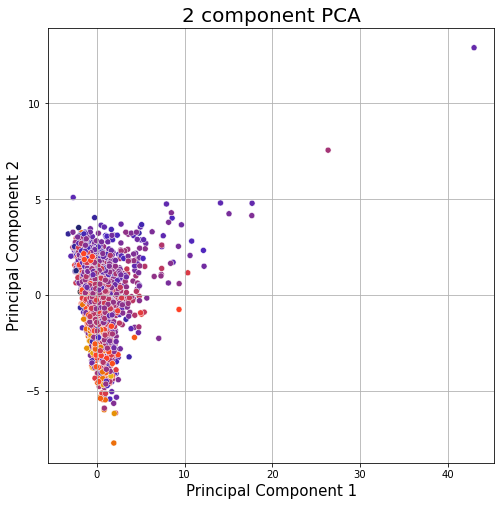

In [40]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

sns.scatterplot(x='principal component 1', y='principal component 2', 
                palette=sns.color_palette("hls", 3),
                cmap='CMRmap', 
                marker='o',
                c=cancer_df.TARGET_deathRate, 
                data=principalDf, 
                )

ax.grid()

In [41]:
# b.
pca = PCA(n_components=4)
skl_pca = pca.fit_transform(X_std)
skl_pca

array([[ 1.27296947,  0.96264796, -0.78391853,  0.91059306],
       [ 0.64568965, -1.76710155, -0.85367422,  0.36636511],
       [-0.91498347,  0.81598335, -0.05367155, -1.00352413],
       ...,
       [ 1.7198551 , -1.03011076, -2.45801086,  1.13333077],
       [ 0.33222367,  0.57906673, -1.1001662 , -0.41552288],
       [ 1.64802853, -1.61847152, -2.93827191, -0.45729878]])

In [42]:
print("Nilai Eigen:")
print(pca.explained_variance_)

Nilai Eigen:
[3.26192282 2.55513657 1.79572814 1.15591566]


8. [10] Berikan analisis Anda secara singkat mengenai perbedaan:
- a. Hasil yang Anda dapatkan pada nomor 5 dan nomor 7a!
- b. Hasil yang Anda dapatkan pada nomor 6 dan nomor 7b

a. Terlihat perbedaan pada t-SNE dan PCA. Walaupun sama-sama digunakan untuk mereduksi dimensi, visualisasi pada t-SNE terlihat terdapat kerenggangan antar titik-titiknya apabila dibandingan dengan PCA. PCA berusaha untuk memaksimalkan varians dan mempertahankan jarak antar pasangan yang besar, sehingga poin-poin yang berbeda terlihat berjauhan dan poin-poin yang dekat terlihat sangat berdempetan. Dalam kasus ini visualisasi pada t-SNE lebih baik apabila dibandingkan dengan PCA

b. Tidak terlihat perbedaan antara keduanya. Hasil transformasi dan nilai eigennya pun sama karena metode yang digunakan sama.